<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week04-workshop-1/Week4_deploy_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   area  rooms   price
0  2104      3  399900
1  1600      3  329900
2  2400      3  369000
3  1416      2  232000
4  3000      4  539900
   area  rooms
0  2104      3
1  1600      3
2  2400      3
3  1416      2
4  3000      4
    price
0  399900
1  329900
2  369000
3  232000
4  539900
Train
[89597.9095428]
[[  139.21067402 -8738.01911233]]
Predict
[[315591.14290408]
 [481015.87425869]]
Deploy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

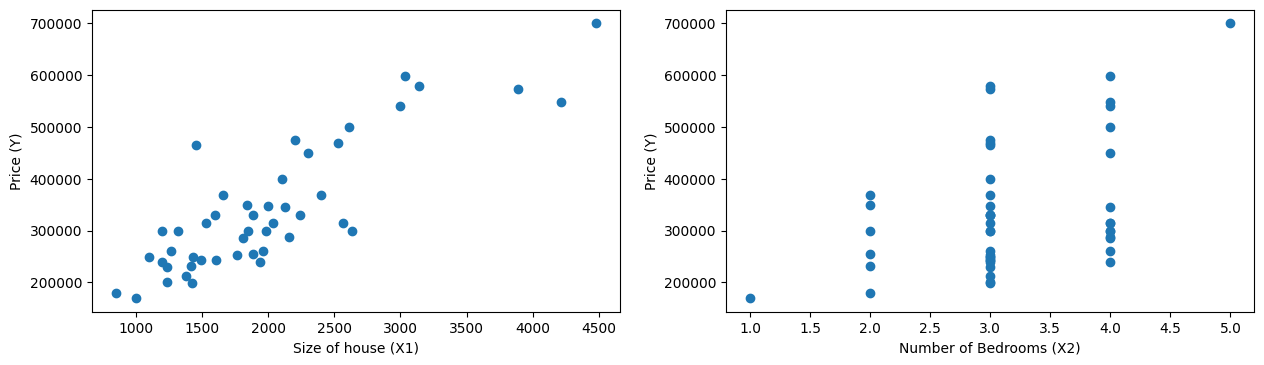

In [32]:
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

data = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week04-workshop-1/data.txt')
print(data.head())
#X = data[["area","rooms"]]
X = data.iloc[:,0:2]
print(X.head())

#y = data.price
#y = data.iloc[:,2]
y = data[["price"]] 
print(y.head())

plt.figure(figsize = (15,4), dpi=100)
plt.subplot(121)
plt.scatter(X.iloc[:,0],y)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")
plt.subplot(122)
plt.scatter(X.iloc[:,1],y)
plt.xlabel("Number of Bedrooms (X2)")
plt.ylabel("Price (Y)")

"""Train model"""
print("Train")
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

"""Predict"""
print("Predict")
#X_test = np.array([[2000,6]])
X_test = pd.DataFrame(
    {
    "area":[2000,3000],
    "rooms":[6,3]
    }
)
result = lin_reg.predict(X_test)
print(result)

"""Deploy"""
print("Deploy")
pickle.dump(lin_reg, open('model.sav','wb') )
from google.colab import files
files.download('model.sav')